In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.utils import to_categorical
from PIL import Image

**Load Dataset**

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


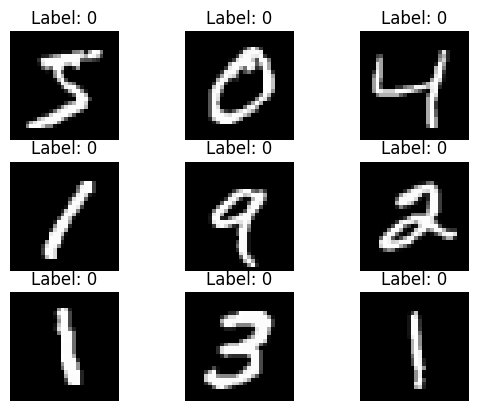

In [3]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.title(f"Label: {np.argmax(y_train[i])}")
  plt.axis('off')
plt.show()

In [4]:
print('Shape_of_X_train:',X_train.shape) # x_train: Training data, containing 60,000 grayscale images of handwritten digits, each of size 28x28 pixels.
print('Shape_of_y_train:',y_train.shape)# y_train: Training labels, containing the corresponding labels for the 60,000 training images.
print('Shape_of_X_test:',X_test.shape)  # x_test: Testing data, containing 10,000 grayscale images of handwritten digits, each of size 28x28 pixels.
print('Shape_of_y_test:',y_test.shape)  # y_test: Testing labels, containing the corresponding labels for the 10,000 testing images.

Shape_of_X_train: (60000, 28, 28)
Shape_of_y_train: (60000,)
Shape_of_X_test: (10000, 28, 28)
Shape_of_y_test: (10000,)


**Normalizing**

In [5]:
# Reshape the data to include a single channel
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')

In [6]:
# Normalize the image
X_train /= 255.0
X_test /= 255.0

In [7]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**Build CNN Model**

In [8]:
def lr_schedule(epoch, lr):
    if epoch > 5:
        lr = lr * 0.5
    return lr

In [9]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(28,28,1),kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu',kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(128, kernel_size=(3, 3), activation='relu',kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.35),
    Flatten(),
    Dense(256, activation='relu',kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(10,activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lr_schedule)


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

**Train the model**

In [14]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)


In [15]:
# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/10
1875/1875 [==============================] - 33s 14ms/step - loss: 0.8343 - accuracy: 0.8041 - val_loss: 0.3384 - val_accuracy: 0.9640 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.5152 - accuracy: 0.9073 - val_loss: 0.2827 - val_accuracy: 0.9783 - lr: 0.0010
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.4658 - accuracy: 0.9201 - val_loss: 0.2668 - val_accuracy: 0.9795 - lr: 0.0010
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4434 - accuracy: 0.9255 - val_loss: 0.2590 - val_accuracy: 0.9809 - lr: 0.0010
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4315 - accuracy: 0.9285 - val_loss: 0.2571 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4268 - accuracy: 0.9293 - val_loss: 0.2538 - val_accuracy: 0.9817 - lr: 0.0010
Epoch 7/10
1875/1875 [========================

313/313 - 1s - loss: 0.1704 - accuracy: 0.9864 - 695ms/epoch - 2ms/step


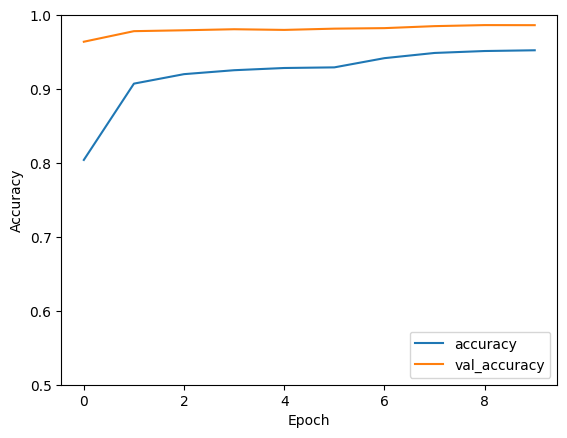

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)


In [17]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")


313/313 [==============================] - 1s 3ms/step - loss: 0.1704 - accuracy: 0.9864
Test accuracy: 0.9864000082015991
Test loss: 0.1703781634569168


313/313 [==============================] - 1s 2ms/step


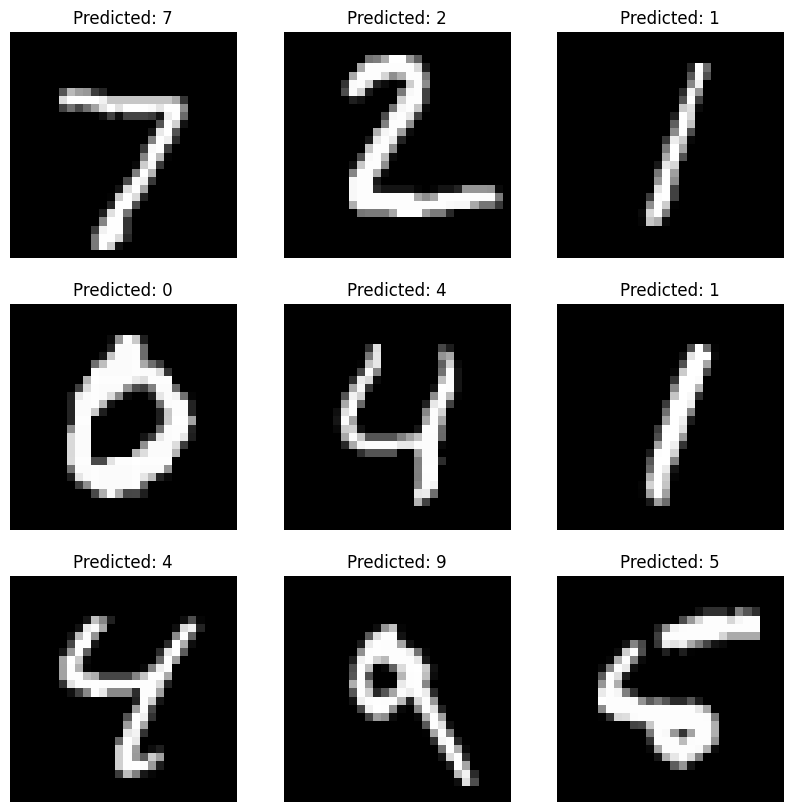

In [18]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Display the first 9 predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()


In [19]:
model.save('mnist_handwriting_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
model = load_model('mnist_handwriting_model.h5')

In [21]:
def predict(image_path):
  # Load the image
  img = Image.open(image_path).convert('L')  # Convert to grayscale

  # Resize the image to 28x28 pixels
  img = img.resize((28, 28), Image.LANCZOS)

  # Convert the image to a numpy array
  img_array = np.array(img)

  # Invert the colors if necessary (MNIST dataset has white digits on black background)
  img_array = 255 - img_array

  # Normalize the image to the range [0, 1]
  img_array = img_array.astype('float32') / 255.0

  # Reshape the image to match the input shape required by the model (1, 28, 28, 1)
  img_array = img_array.reshape(1, 28, 28, 1)

  # Make a prediction
  prediction = model.predict(img_array)
  predicted_digit = np.argmax(prediction)

  print(f"Predicted digit: {predicted_digit}")

  # Display the image and the prediction
  plt.imshow(img_array.reshape(28, 28), cmap='gray')
  plt.title(f"Predicted Digit: {predicted_digit}")
  plt.axis('off')
  plt.show()


**Prediction on Custom Data**

1/1 [==============================] - 0s 255ms/step
Predicted digit: 3


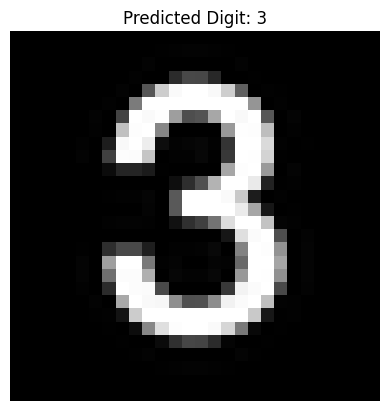

In [22]:
# image should be black and white
predict('/content/3.jpg')

1/1 [==============================] - 0s 66ms/step
Predicted digit: 1


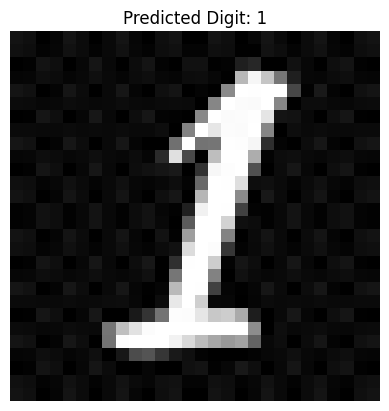

In [23]:
predict('/content/1.jpg')

1/1 [==============================] - 0s 25ms/step
Predicted digit: 8


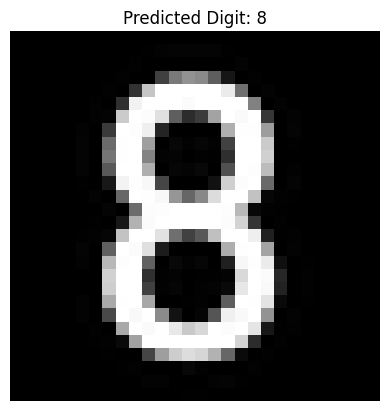

In [25]:
predict('/content/8.png')